# Mamatrote
## An acronym-free framework for statistical detection

## Preliminaries

This work describes a general method for the detection of different types of structures in a set of elements that belong to a certain ambient space. The general idea is that such structures express themselves as unusual concentrations of subsets of such elements around these structures, as opposed to being randomly scattered throughout the space. 

## Notation

$$%
\newcommand{\vec}[1]{\mathbf{#1}}%
\newcommand{\mat}[1]{\mathbf{#1}}%
\newcommand{\est}[1]{\hat{#1}}%
\newcommand{\set}[1]{\mathcal{#1}}%
\newcommand{\iter}[1]{^{(#1)}}%
\newcommand{\expe}[2]{\mathbb{E}_{#1}\left[#2\right]}%
\newcommand{\prob}[1]{\mathrm{Pr}\left\{#1\right\}}%
\newcommand{\ind}[1]{\mathbf{1}\left(#1\right)}%
\newcommand{\setdef}[1]{\left\{#1\right\}}%
\newcommand{\tuple}[1]{\left(#1\right)}%
\def\gauss{\mathcal{N}}%
\def\ber{\mathrm{Ber}}%
\def\uni{\mathrm{Uni}}%
\def\obs{\mathcal{O}}%
\def\opt{^{*}}%
\def\tra{^T}%
\def\inv{^{-1}}%
\def\pinv{^{\dagger}}%
\def\reals{\mathbb{R}}%
$$
* Dimensions are lower capital letters such as $m,n,p$. Random variables are capital letters such as $X,Y,Z$. 
* Vectors are lower case bold, e.g., $\vec{x}$. 
* Matrices are upper-case bold as in $\mat{A}$. 
* Spaces are in double bold, such as $\mathbb{R},\mathbb{C},\mathbb{X}$.
* Sets are in calligraphic, such as $\set{O}$; their cardinality is written as $|\set{O}|$
* The probability of a given event $\omega$ is $\prob{\omega}$. 
* $\expe{X}{f(X)}$ is the expectation of the function $f(X)$ w.r.t. the distribution of $X$.
*The indicator function is denoted as $\ind{A=1}$

## Common conventions

Letters such as $i,j,k,l,r$ are reserved for indexes. The letter $t$ indicates  iteration number. Letters such as $m,n,p$ are for dimensions. $a,b,c$ are usually constants. $d$ is used for distances,  $e$ for errors, $f,g,h$ for functions. $u,v,w,x,y,z$ usually denote realizations of correponding random variables $U,V,W,X,Y,Z$. The letters $x,y,z$ can also denote 2D/3D spatial coordinates.
Greek letters $\alpha,\beta,\gamma,\tau$ are usually system hyperparameters (such as a threshold $\tau$), whereas $\mu,\theta,\sigma$ are commonly used for PMF/PDF parameters.

## General setting

As mentioned, the task is to detect meaningful structures hidden among the set of observed elements.

Instances of such elements, called _objects_, are denoted by the letter $o$. A common example of an object is a point in $\reals^2$. Objects have parameters of themselves. In the case of 2D points, they are the pair of coordinates $(x,y)$.

The set of elements observed in a particular instance of a problem is called a _dataset_ or _observation_: $$\set{O} = \setdef{ o_1,o_2,\ldots,o_n}.$$

A particular instance of a structure is called a _model_ and is represented by the letter $m$. The set of possible structures to be detected are grouped into a family usually denoted as $\set{M}$. A common example of such family is the set of line segments in $\reals^2$, each of which can be represented in various ways, for example the coordinates of the endpoints $s=\tuple{x_1,y_1,x_2,y_2}$.

The notion of "concentration arond a model $m$" implies a metric and a distance. Concretely, we need to define a distance from any object $o$ to any model $s$ is $d(o,m) \in \reals^+$. Continuing the above example is the Euclidean distance from a point $o$ to a segment $m$. More generally we may consider geodesic distances over manifolds such as the surface of a sphere, etc.

We will also consider a more general measure of _closeness_ from an object $o$ to a model $m$ in therms of an _error_  $e(o,m)$. For example, suppose we define a model in $\reals^m$ to be a the level set of a function over $\reals^{m+1}$: 

$$m = \setdef{x: f(x) = 0}.$$

We may then simply define $e(o,s)=|f(o)|$ or some non-negative function $g(f(o)).$


# Main idea

The general detection pipeline involves the following steps:

1. formulate the objects and the models in a parametric fashion
1. find a set of _candidate models_ $\set{S}$
1. For each model, define _local null model_ model $\hat{m}$ representing the abscence of evidence for that model; this is in contrast to other works, which consider a global null model, such as a uniform distribution over a compact subset of the ambient space.
1. keep those models which pass the _significance test_ in a set $\set{S}^+$
1. Generate a set of _refined models_, $\set{S}\opt$, by  removing those models in $\set{S}$ that are _redundant_ w.r.t. some criterion. 

The above pipeline is quite standard in many detection frameworks. The novel aspect of this work lies in performing a _significance test_ w.r.t. a _local null model_. This in turn calls for novel ways of defining such tests. This is where most of our work will be devoted to. As secondary goals, we will also delve into the subject of _refinement_, and the treatment of multiple analysis scales.

On the other hand, finding a proper set of candidate models is a very difficult problem. Clearly, the set $\set{M}$ if infinite and generally uncountable. Even if we restrict ourselves only to those models which can be determined by subsets of objects (e.g., all line segments defined by all pairs of points in $\set{O}$), the number of candidates can be huge.
Thus, for now and most of this work, we will assume $\set{S}$ to be given to us.


## Significance test

A model will be considered significant if an _unusual_ number of objects, _highly unlikely_ to be purely random, is close to the model, that is, they are _concentrated_ around it. There are many ways to measure this concentration. 

## Background model

### Unidimensional prior

Given a model $m$, we define the distance of an object $o$ to $m$, $\delta(o,m)= \min_{q} \delta(o,q)$. Let $o'$ be the closes point to $o$ in $m$.
The background model assumes that, for any given $o'$, all points such that $o'$ is the closest point to $m$ follow a unidimensional distribution along the **normal** to $m$ in $o'$ which is centered at $o$. This distribution is unimodal and centered at $0$. Possible choices include the Uniform, Gaussian or Laplacian distributions. The density of this distribution is denoted by $f_m(\cdot)$. 

Note that, in general, the density $f_m(d)$ does _not_ define a valid distribution over the object space. Such distribution could be worked out, but we will avoid this path as it may be very complicated depending on the shape of $m$.

In the above definsstion, the scale of $f_m(\cdot)$ (e.g., the standard deviation $\sigma$ of the Gaussian) plays a key role in the analysis. This will be discussed later.

The distribution $f_m$ in turn induces a distribution on $\delta(o,m)=\delta(o,o')$, $f'_m(\delta)$. For example, if the background distribution is Gaussian, the corresponding distribution on $\delta$ is a $\chi_1^2$ distribution on $e$.  If Laplacian, it is an exponential, and so on.

### Multidimiensional prior

Alternatively, if the model $m$ is a $d$-dimensional differentiable manifold we may consider a prior distribution over the orthogonal complement of the tangent subspace of $m$ at $o'$. In such cases a multidimensional Gaussian or the Uniform distribution over a disk of radius $\sigma$ could be used to define $f_m$ and $f_m'$.

## Significance tests

**A-contrario**: We may count the number of objects $o$ whose probability $\delta(o,m)$ is above a given threshold $\tau$ and  check whether this number is much higher than the expected number of points in the local analysis region under the background model. One principled way to do this is via the _a-contrario_ formalism, as it automatically accounts for the inherent complexity of the models being evaluated. We will formally define this methodology later.

**Divergence**: The above idea could be _softened_ by computing the empirical distribution of errors within a region and comparing it to the error distribution $f_m(e)$ induced by the local background model. A significant deviation should provide strong evidence for the presence of the model. Notice that, in principle, this formulation does not account for the complexity of the model being tested.

**Likelihood** Instead of comparing to the empirical distribution of $e$  with respecto to the one induced by the background model, we may compute the _empirical mean_ of the log-likelihood  $\log f_m(o)$ over all $o \in \set{O}$, and see if it deviates significantly from the _expected_ value of the log-likelihood of $\log f_m(O)$, $\expe{O}{f_m(O)}$ with respect to the null model $f_m()$. We can write such a test as:

$$\prob{%
\frac{1}{|\set{O}|}%
\sum_{o \in \set{O}} -\log f_m(o)%
> \expe{m}{-\log f_m(O)}%
} >  \epsilon$$ 

Again, the above method does not explicitly include a term for penalizing complex models, which is generally not desirable.

## Analysis scale

A critical notion in any of the above significance test is that of _scale_, and it permeates the main parameters of the different proposed methods: the size of the region around a model, or the scale/support of the distributions used in the last two methods.  This is a very sensitive parameter: different scales will often yield different results. In order to alleviate this problem, our methodology includes a  method for  alleviating this problem by combining the results at different scales. 

## Multiple tests

In general, our candidate set $\set{S}$ will contain several models. Therefore, in order to reduce the number of false detections (also called _alarms_), we need to account for this multiplicity, for example by applying a Bonferroni correction.

# Onwards

We will now make the above ideas concrete by working out a very simple example: clustering.


## Coding preliminaries



In [ ]:
#
# main libraries
#
import numpy as np
from numpy import random as rand # random number generation
from numpy import linalg as la   # inverses, etc.
from scipy import stats,special  # distributions
import math
#
# plotting
#
import matplotlib as mp 
from matplotlib import pyplot as plt
from matplotlib import cm as colormap 
#
# customize Matplotlib
#
mp.rcParams['axes.edgecolor'] = (0.2,0.2,0.2)
mp.rcParams['figure.figsize'] = (10,10)


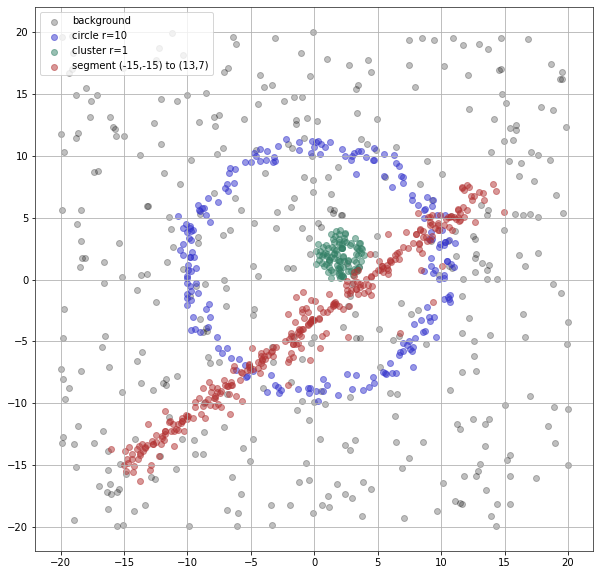

In [ ]:


LOG2PI = math.log2(math.pi)
LOG22PI = math.log2(math.pi*2.0)


def kullback_leibler(q,p):
  return q*math.log2(q/p) + (1-q)*math.log2((1-q)/(1-p))


def entropy(p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return -p*math.log2(p)-(1-p)*math.log2(1-p)


def stirling_factorial(n):
    return math.sqrt(2*math.pi*n)*math.pow(n/math.e, n)


def stirling_logcomb(n,k):
    if k == 0:
      return 0
    elif n == 0:
      return 0
    elif k > n:
      return 0
    elif n == k:
      return 1
    else:
      return 0.5*LOG2PI + 0.5*math.log2(n) + k*math.log2(n/k) + (n-k)*math.log2(n/(n-k))


def bernoulli_shannon_codelength(n,k):
    if n == 0:
        return 0
    if k > 0 and k < n:
        return k*math.log2(k/n) + (n-k)*math.log2(1-k/n)
    else:
        return 0
      

def binomlog2(n, k):
    # Assumes binom(n, k) >= 0
    return -special.betaln(1 + n - k, 1 + k)/np.log(2) - np.log2(n + 1)


#
# data generation
#
default_seed = 55627647

def euclidean_box(ndims,npoints,seed=default_seed):
  '''
  sample npoints from uniform distribution over [0,1]^ndims
  points are returned as rows of an npoints x ndims matrix
  '''
  rng = rand.default_rng(default_seed)
  return rng.uniform(low=0,high=1,size=(npoints,ndims))


def dgauss(ndims,npoints,rng):
  '''
  Gaussian displacement
  '''
  return rng.normal(scale=1,size=(npoints,ndims))
             
def dlaplacian(ndims,npoints,rng):
  '''
  Laplacian displacement (isotropic)
  '''
  #
  # uniform direction, Laplacian norm
  #
  d      =  rng.normal(size=(npoints,ndims))
  norm   =  rng.laplace(size=npoints)/la.norm(d,axis=1)
  d     *= np.outer(norm,np.ones(2))
  return d


def ddisk(ndims,npoints,rng):
  '''
  Uniform displacement within disk
  '''
  points = np.zeros((npoints,ndims))
  nleft = npoints
  while nleft > 0:
    cand =  rng.uniform(low=-1,high=1,size=(5*nleft,ndims))
    cnorm = la.norm(cand,axis=1)
    good = cand[cnorm <= 1,:]
    ngood = good.shape[0]
    if ngood >= nleft:
      points[-nleft:,:] = good[:nleft,:]
      break
    else:
      points[-nleft:(-nleft+ngood)] = good
      nleft -= ngood
  return points


def cluster(center,dispfun,scale,npoints,seed=default_seed):
  '''
  sample npoints from a Gaussian distribution centered at center
  '''
  ndims = len(center)
  rng = rand.default_rng(default_seed)
  return center+scale*dispfun(ndims,npoints,rng)


def circle(center,radius,dispfun,scale,npoints,seed=default_seed):
  '''
  sample points around a spherical hypersurface
  we first pick a point uniformly over the surface and then displace it
  by adding an isotropic Gaussian vector 
  '''
  rng  = rand.default_rng(default_seed)
  # 
  # points over surface : project i.i.d. Gaussian vectors
  #
  ndims = len(center)
  center = np.array(center)
  points = rng.normal(loc=0,size=(npoints,ndims))
  aux = la.norm(points,axis=1)
  points *= radius/np.outer(aux, np.ones(2))
  blur = scale*dispfun(ndims,npoints,rng)
  return center + points + blur


def segment(a,b,dispfun,scale,npoints,seed=default_seed):
  '''
  sample points around a line segment 
  '''
  rng  = rand.default_rng(default_seed)
  # 
  # points over surface : project i.i.d. Gaussian vectors
  #
  ndims = len(a)
  a = np.array(a)
  b = np.array(b)
  points = a+np.outer(rng.uniform(size=(npoints)),b-a)
  blur = scale*dispfun(ndims,npoints,rng)
  return points + blur

#
# test
#
p0 = 40*euclidean_box(2,400)-20
p1 = circle((0,1),10,dgauss,0.5,200)
p2 = cluster((2,2),ddisk,2,100)
p3 = segment((-15,-15),(13,7),dlaplacian,1,300)
plt.figure()
plt.scatter(p0[:,0],p0[:,1],color=(0.0,0.0,0.0,0.25),label='background')
plt.scatter(p1[:,0],p1[:,1],color=(0.2,0.2,0.8,0.5),label='circle r=10')
plt.scatter(p2[:,0],p2[:,1],color=(0.2,0.5,0.4,0.5),label='cluster r=1')
plt.scatter(p3[:,0],p3[:,1],color=(0.7,0.2,0.2,0.5),label='segment (-15,-15) to (13,7)')
plt.legend()
plt.grid(True)
plt.show()


# First example: cluster detection

We begin with the task of detecting the presence of a cluster. We will consider a single model corresponding to a cluster at the origin, $\set{S}=\setdef{(0,0)}$. We will now work out each of the proposed significance tests.

The _working model_ for the background will be $\uni[-\sigma,\sigma]$ so that $f_m(d)=1/2\sigma$ when $|d|\leq \sigma$ and $0$ otherwise. Note that this is not a postulate about the true nature of the background, but a device to express the locality of the analysis. Many other distributions are possible, for example a Gaussian or a Laplacian centered at $0$.

In the simulations below the actual background points are sampled from the Uniform distribution over $[-10,10]\times[-10,10]$.

## Method 1: A-contrario

According to the model above, we define the error to be $e(o,m)=|d(o,m)|$, which results in $f_m(e)=\uni[0,\sigma]$. Now, we define a subset $\set{O}_m \subseteq \set{O}$ of those points that belong to the support of $f_m$, and set $n_m=|\set{O}_m|$.

Next we define a threshold on the error, $\tau$, and the subset of points whose error is below $\tau$ as $\set{O}_{m,\tau}=\setdef{o \in \set{O}_m: e(o,m) \leq \tau}$, $n_{m,\tau}=|\set{O}_{m,\tau}|$ being its cardinalty. In this case we have a single model $m$, so we may drop the $m$ subindex for the time being.

The probability of any point in $\set{O}_m$ having an error less than $\tau$ is $p_\tau = F_m(\tau)$, where $F_m(\tau)=\prob{x: x \leq tau}$ is the CDF of the background model. Given $n_m$, the probabily of observing $N > n_{m,\tau}$ i.i.d. points under the background model is given by the tail of the binomial distribution with parameters $p_\tau$ and $n_m$ starting at $n_{m,\tau}$:

$$\prob{N \geq n_{m,\tau}}=\sum_{i=n_{m,\tau}}^{n_m}{n_m \choose i}p_\tau^i(1-p_\tau)^{n_m-i}.$$

### Number of false alarms (NFA)

The idea is to declare a model to be significant if the above probability is close to $0$, that is, it is extremely unlikely to produce the number $k_\tau$ under the background model. However, before defining a probability threshold, in general we need to perform several tests. In the running example, if we have $n$ points, there are $n$ cluster candidates, and we should check each one of them for significance. Also, we should test for various $\tau$ values, say $T$. All things considered, in our case, we need to perform $N_T=T{\times}n$ tests. Following the standard procedure in hypothesis testing, if we want a significance level of $\alpha$, then we need to correct for the multiple tests using Bonferroni correction, so that the probability threshold is now $\alpha/N_T$. In summary, we declare a detection whenever:

$$\prob{N \geq n_{m,\tau}} = \varepsilon = \alpha/N_T.$$

Here $\varepsilon$ is the expected Number of False Alarms (NFA) and it is usually set to $\varepsilon=1$, so that only one false detection is seen on average.

In the running example, all these values are trivial to compute. However, in more complex scenarios $N_T$ may be more involved. 

What remains to be set is the number $T$ of different values of $\tau$ that we are willing to test. This implies quantizing the range $[0,\sigma]$ into $T$ values. Notice that we are leaving aside the question of _how_ to perform such quantization. Let us assume a uniform quantization hereafter.

Let's get on with it.



alpha= 1 eps= 0.005 scale= 3 max_dist= 3
i= 0 n_m= 127
	j= 0	tau=0.6000	F_tau=0.2000000000	k_mt=037	P=0.0050370353	eps=0.0050000000
	j= 1	tau=1.2000	F_tau=0.4000000000	k_mt=075	P=0.0000050155	eps=0.0050000000
	j= 2	tau=1.8000	F_tau=0.6000000000	k_mt=106	P=0.0000000028	eps=0.0050000000
	j= 3	tau=2.4000	F_tau=0.8000000000	k_mt=114	P=0.0010374672	eps=0.0050000000
[[0. 1. 1. 1.]]


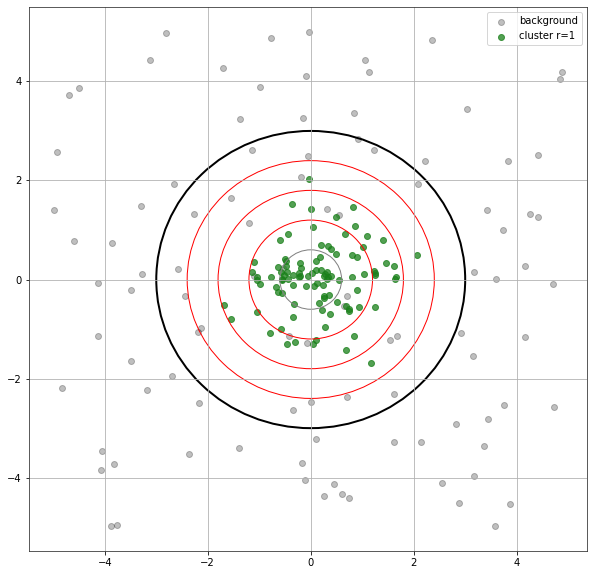

In [ ]:

def a_contrario(O,S,scale,tau_vals,max_dist=None,alpha=1,distance=None,distro=None):
  '''
  a-contrario detection 
  the function arguments distance and distro allow to configure
  this detection scheme for a wide variety of cases.
  For the default values, it corresponds to finding clusters using a 
  uniform prior for the specified scale and values of the distance 
  threshold tau (mandatory). This default configuration is:
   * d(o,m) = |o-m| 
   * distro.cdf(x) = x/scale
  '''
  if distance is None:
    distance = lambda x,y: la.norm(x-y)

  if max_dist is None:
    max_dist = scale
  
  if distro is None:
    distro = stats.uniform(loc=0,scale=scale)

  nS = len(S)
  ntau = len(tau_vals)
  n  = len(O)
  ntest = ntau*1
  significant = np.zeros((nS,ntau))
  eps = alpha/n
  print('alpha=',alpha,'eps=',eps,'scale=',scale,'max_dist=',max_dist)
  for i,m in enumerate(S):
    # objects in analysis window
    O_m = list()
    for o in O:
      d = distance(o,m)
      if d < scale:
        O_m.append(o)
    n_m = len(O_m)
    print('i=',i,'n_m=',n_m)
    # error threshold tau...
    for j,rel_tau in enumerate(tau_vals):
      tau = rel_tau*scale
      O_mt = list()
      for o in O_m:
        d = distance(o,m)
        if d < tau:
          O_mt.append(o)
      k_mt = len(O_mt)

      F_t = distro.cdf(tau) # probabily threshold for tau
      #
      # declare significance if P(k > k_m) > eps
      #
      P = stats.binom(n_m,F_t).sf(k_mt)
      print(f'\tj={j:2}\ttau={tau:6.4f}\tF_tau={F_t:12.10f}\tk_mt={k_mt:03d}\tP={P:12.10f}\teps={eps:12.10f}')
      if P < eps:
        significant[i,j] = 1
  return significant  


def test_cluster(criterion=a_contrario):
  #
  # Gaussian disk
  #
  p0 = 10*euclidean_box(2,100)-5
  p2 = cluster((0,0),dgauss,0.7,100)
  #p2 = cluster((0,0),ddisk,1,50) # this one creates a uniform disk


  O = list()
  for i in range(p0.shape[0]):
    O.append(p0[i,:])
  for i in range(p2.shape[0]):
    O.append(p2[i,:])

  S = list()
  S.append(np.array([0,0]))

  scale = 3
  tau_vals=(0.2,0.4,0.6,0.8)

  sig = criterion(O,S,scale=scale,tau_vals=tau_vals,alpha=1)
  print(sig)

  fig = plt.figure()
  ax = fig.gca()
  plt.scatter(p0[:,0],p0[:,1],color=(0.0,0.0,0.0,0.25),label='background')
  plt.scatter(p2[:,0],p2[:,1],color=(0.1,0.5,0.1,0.75),label='cluster r=1')
  c = plt.Circle((0,0),radius=scale,color='k',fill=False,lw=2)
  ax.add_patch(c)
  for t,s in zip(tau_vals,sig[0,:]):
    if s:
      color = 'r'
    else:
      color = 'gray'
    c = plt.Circle((0,0),radius=t*scale,color=color,fill=False)
    ax.add_patch(c)
  plt.legend()
  plt.grid(True)
  plt.show()


test_cluster(a_contrario)


### Comments

As can be seen, the method produces a detection up to a certain scale. 

Note that here we are forcing the method to evaluate a _single_ model, but we are applying the test as if _all_ the points in the example are tested as models (cluster centers).

It is interesting to note that the above results changes dramatically with the number of points in the cluster. For $50$ points, no detection is produced at any scale. For $100$ points, almost all of them. 


## Method 2: Chi-squared test on CDF

In the a-contrario method above, an independent test is performed for each value of $\tau$. Given $\tau$, the level of significance is given by how much larger the number of observed points $n_{m,\tau}$  is above the _expected_ value of that event under the background model, which is $n_mp_\tau$:

$$\expe{E}{n_{m,\tau}} = \expe{E}{\sum_{j=1}^{n_m} \ind{f(e_j) < p_\tau}} = 
\sum_{j=1}^{n_m}\expe{E}{\ind{f(e_j) < p_\tau}} = \sum_{j=1}^{n_m} \prob{f(e_j) < p_\tau}=n_mp_\tau$$

Now consider the empirical cumulative distribution defined by the observed quantities $(n_{m,\tau_1},n_{m,\tau_2},\ldots)$:

$$\hat{F}(\tau_i) = \frac{n_{m,\tau_i}}{n_m}$$

The a-contrario method above performs an individual test on each of these values. Instead,  we may then compare this empirical distribution $(\hat{F}(\tau_1),\hat{F}(\tau_2),\ldots)$ to the corresponding one that would have been obtained using the background model: $(F(\tau_1),F(\tau_2),\ldots)$. In doing so, we may use the same metric of the a-contrario case (tail of the binomial distribution) for each threshold and combine them in some way. It is not obvious how to do so, as the tests are not independent (this is also a potential source of biases in the NFA approach when comparing different $\tau$ values, as the tests are far from independent).

Another way to compare the densities, and considering that the  Binomial can be approximated to a Gaussian for large $n_m$, is to perform a Pearson $\chi^2$ test on $F$ and $\hat{F}$. This provides its own $p$-value which can then be corrected using Bonferroni as in the NFA case. 

Concretely, we compute:

$$X^2=n_m\sum_{i=1}^{k} \frac{\left(\hat{F}(\tau_i)-F(\tau_i)\right)^2}{F(\tau_i)}$$ 

and assume $X^2$ to have a $\chi^2$ distribution with $k-1$ degrees of freedom, (denoted as $\chi^2_{k-1}$). The significance of the test is given by this distribution evaluated at $X^2$.  


alpha= 1 eps= 0.005 scale= 3 max_dist= 3
i= 0 n_m= 127
	j= 0	tau=0.6000	F_tau=0.2000000000	Fhat_tau=0.2913385827	E_t=    0.0417
	j= 1	tau=1.2000	F_tau=0.4000000000	Fhat_tau=0.5905511811	E_t=    0.0908
	j= 2	tau=1.8000	F_tau=0.6000000000	Fhat_tau=0.8346456693	E_t=    0.0918
	j= 3	tau=2.4000	F_tau=0.8000000000	Fhat_tau=0.8976377953	E_t=    0.0119
X2 29.99343832020994 p-value 6.705494568677414e-07
[[1. 1. 1. 1.]]


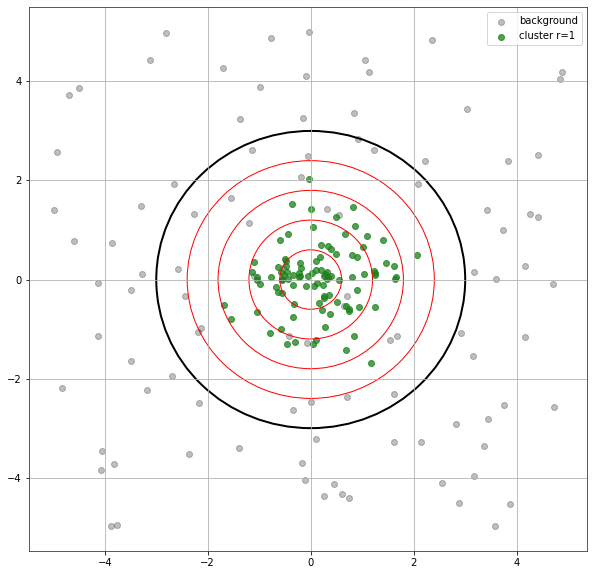

In [ ]:

def chi_squared(O,S,scale,tau_vals,max_dist=None,alpha=1,distance=None,distro=None):
  '''
  chi-squared detection 
  the function arguments distance and distro allow to configure
  this detection scheme for a wide variety of cases.
  For the default values, it corresponds to finding clusters using a 
  uniform prior for the specified scale and values of the distance 
  threshold tau (mandatory). This default configuration is:
   * d(o,m) = |o-m| 
   * distro.cdf(x) = x/scale
  '''
  if distance is None:
    distance = lambda x,y: la.norm(x-y)

  if max_dist is None:
    max_dist = scale
  
  if distro is None:
    distro = stats.uniform(loc=0,scale=scale)

  nS = len(S)
  ntau = len(tau_vals)
  n  = len(O)
  ntest = ntau*1
  significant = np.zeros((nS,ntau))
  eps = alpha/n
    
  chi2 = stats.chi2(df=ntau-1)
  print('alpha=',alpha,'eps=',eps,'scale=',scale,'max_dist=',max_dist)
  for i,m in enumerate(S):
    # objects in analysis window
    O_m = list()
    for o in O:
      d = distance(o,m)
      if d < scale:
        O_m.append(o)
    n_m = len(O_m)
    print('i=',i,'n_m=',n_m)
    X2 = 0    
    for j,rel_tau in enumerate(tau_vals):
      tau = rel_tau*scale
      O_mt = list()
      for o in O_m:
        d = distance(o,m)
        if d < tau:
          O_mt.append(o)
      
      Fhat_t = len(O_mt)/n_m
      F_t = distro.cdf(tau) # probabily threshold for tau
      E_t = (Fhat_t-F_t)**2/F_t
      X2 += E_t
      print(f'\tj={j:2}\ttau={tau:6.4f}\tF_tau={F_t:12.10f}\tFhat_tau={Fhat_t:12.10f}\tE_t={E_t:10.4f}')
    X2 *= n_m
    pval = chi2.pdf(X2)
    print('X2',X2,'p-value',pval)
    if chi2.pdf(X2) < eps:
      significant[i,:] = 1 #only 1 value per model: all 1 or all 0
  
  return significant  

test_cluster(chi_squared)


## Method 3: Kolmogorov-Smirnov test


The last method that we propose is possibly the most direct of them. The idea is to compare the empirical $\hat{F}(e)$  vs. true $F(x)$  CDFs. The diference with the previous method is that we do not fix a sequence of values of $\tau$. Instead, we use the observed errors. This is in fact the _standard_ definition of _empirical CDF_. Suppose we have the sequence of errors corresponding to the objects, $\setdef{e_1,e_2,\ldots}$, then:


$$\hat{F}(e) = \frac{\sum_i \ind{e_i < e}}{n}$$ 

We can then compare both distribution using, for example, the Kolmogorov-Smirnov test. The K-S statistic is given by:

$$\sup_e |\hat{F}(e)-F(e)|$$

Note that this test does not distinguish whether the densities differ due to the points being _more_ or _less_ concentrated around $0$. We could use something like:


$$\sup_e \max\{0,\hat{F}(e)-F(e)\}$$

**Nota: en el test básico hay un montón de distribuciones especiales y números para calcular el $p$-value. No entré en esos detalles aún. Estoy siguiendo lo que dice Wikipedia nomás, no tengo una mejor fuente a mano:**

[Kolmogorv-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)






i= 0 n_m= 127 scale  3 KS 0.2572369687298488


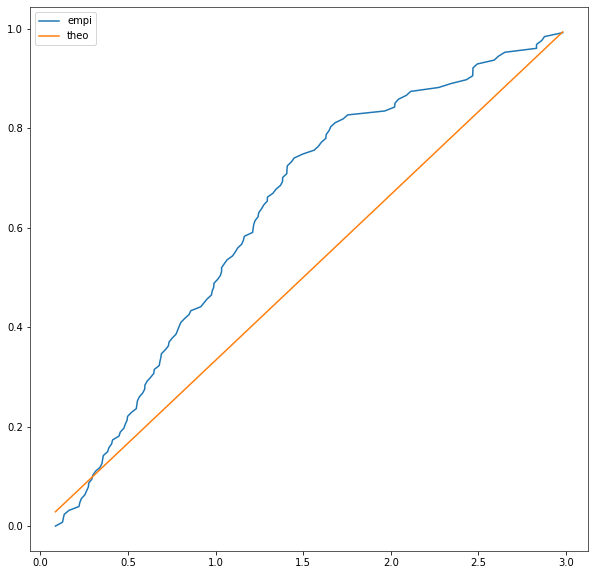

[[1. 1. 1. 1.]]


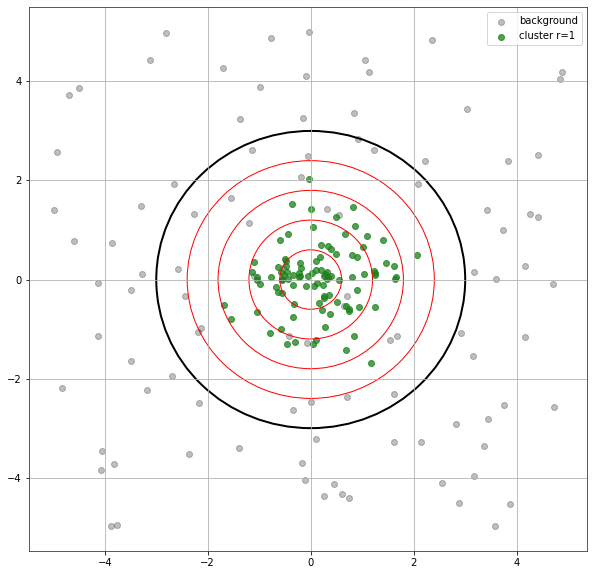

In [ ]:
from numpy.lib.type_check import nan_to_num
def kolmogorov_smirnov(O,S,scale,tau_vals,max_dist=None,alpha=1,distance=None,distro=None):  
  '''
   * d(o,m) = |o-m| 
   * distro.cdf(x) = x/scale
  '''
  if distance is None:
    distance = lambda x,y: la.norm(x-y)

  if max_dist is None:
    max_dist = scale
  
  if distro is None:
    # obsolete comment??:
    #
    # a uniform won't do here, as the loglik is constant throughout the 
    # analysis region and both the expected and empirical will be very
    # close, always.
    #distro = stats.chi(df=2,loc=0,scale=scale)
    #
    # 
    #
    distro = stats.uniform(loc=0,scale=scale)
  nS = len(S)
  ntau = len(tau_vals)
  n  = len(O)
  ntest = ntau*nS
  significant = np.zeros((nS,ntau))
  eps = alpha/n
  #
  # pending
  #
  for i,m in enumerate(S):
    # objects in analysis window
    O_m = list()
    for o in O:
      d = distance(o,m)
      if d < scale:
        O_m.append(o)
    n_m = len(O_m)
    print('i=',i,'n_m=',n_m,end=' ')
    alogp = 0
    distances = list()
    for o in O_m:
      distances.append(distance(o,m))
    #
    # sort distances; the values and the indexes define define the empirical distribution 
    # Fh by itself: Fh(e) = i/n, e_i <= e < e_{i+1}
    # 
    Fh_points = np.array(sorted(distances))
    Fh = np.arange(len(Fh_points))/n_m
    #
    # perform Kolmogorov-Smirnov test between Fh and F (given by the background model) 
    #
    F = distro.cdf(Fh_points) 
    #
    # PENDING
    #
    KS_dist = max(Fh-F) # we don't care about cases where Fhat < F
    #
    #
    print('scale ',scale,'KS',KS_dist)
    significant[i,:] = KS_dist > 0.1 # how do we choose the threshold??
    plt.figure()
    plt.plot(Fh_points,Fh,label='empi')
    plt.plot(Fh_points,F,label='theo')
    plt.legend()
    plt.show()
  
  return significant  

test_cluster(kolmogorov_smirnov)


# Multiple Scales

The analysis scale $\alpha$ is a major parameter of the framework. It is easy to see that the system will always detect a structure for sufficiently large $\sigma$, and stop detecting for sufficiently small $\sigma$. Here we propose data-centric (agnostic) method to deal with this problem.

Which is?? Maybe:

* Sweep across a range of scales and choose the smallest significative one
  * The largest scale is the diameter of the dataset
  * The smallest one is the minimum distance between two different points in the dataset





# Merging redundant models

The last technical aspect that we need to cover in depth between delving into more interesting applications of the framework is this: when multiple similar models explain the same (or approximately the same) set of points, which one should we keep? Should we combine them into some sort of "average" model?

Who knows! Pending stuff.



# TODO

According to the above, we have the following outstanding issues:

* define test (blur + K-S?)
* handle multiple scales
  * muy relevante
* merge (cluster) models (we are also working in parallel on this specific issue with J. Cugliari and M. Bourel)
  * menos relevante?
* try this stuff on other problems (need help from Rafa)
  1. más de un cluster
  1. rectas
  1. puntos de fuga? (dual de rectas)
* validation methodology
  1. define toy examples w/ground truth
  1. 
* probar RANSAC varias veces a ver si de ese mdo podemos fijar los umbrales (idea de Nacho a explicar mejor)

## 2022-11-01

* Vimos significancia de NFA vs. cantidad de puntos y escala de análisis
* Se puede analizar muy bien el caso rectas porque la significancia se puede ver muy bien gráficamente en función de esas dos cosas
* Estaría bueno plotear 2D significancia vs. esas dos cosas
* En definitiva, verificar que la detección es coherente según las dos variables principales
* Podemos analizar en profundidad la comparación entre la distribución de los puntos (la que se usó en el ground truth) y la de fondo (ej. Laplaciana vs. Uniforme) y luego ver qué pasa con distintas distribuciones, y ver por ejemplo las distribuciones empíricas (y teóricas) cumulativas entre ambas cosas.
* Queda pendiente lo que iba a hacer Nacho. que es escribir una primera versión del texto base del paper, con formalismos, preguntas, etc.
* Seguimos concentrados en rectas

A futuro

* Jugar con más de una recta
* Ver qué pasa con rectas paralelas _lejos_ y las escalas. Ver cuándo empiezan a _interferir_
* Ver qué pasa con _grillas_ (rectas paralelas horizontales y verticales)
Todo lo anterior puede ser interpretado "psicofisicamente" medio _hand wavy_, como hicimos con el MDL vs NFA.

* Después de tener esto, podemos pasar a clusters

## 2022-11-15

Implementé los siguientes experimentos en dos variables. Todos tienen como una de las variables el parámetro principal de nuestro método: la escala de análisis.

* NFA vs escala de análisis y cantidad total de puntos (background + foreground)
* NFA vs escala de análisis y proporción de puntos fg/bg para cant. total fija (10000)
* NFA vs escala de análisis y proporcion de escala de la distribucion que 'difumina' (scatter) al modelo y la escala de los puntos en el background.
* Todo lo anterior para:
   * clusters en 2D ($m=0$, $n=2$)
   * clusters en 3D ($m=0$, $n=3$)
   * lineas   en 2D ($m=0$, $n=2$)
   * lineas   en 3D ($m=0$, $n=3$)
   * planos   en 3D ($m=2$, $n=3$)
   
Lo que se observa, resumidamente, es:

* En este momento, las cosas funcionan bien (al parecer) para cualquier dimension ambiente y del espacio afin!
* Todos dan cosas razonables
* Todos dan resultados casi idénticos para todo $m$ y $n$!
* Los resultados de proporción y cantidad total de puntos dan casi iguales entre sí
* Las curvas son _extremadamente_ regulares

Las conclusiones parciales que yo puedo sacar son:

* Creo que la invarianza en $m$ y $n$ es de hecho esperable: según la dist. que usamos tanto para el _scatter_ como para la banda de análisis, la distribución esperada de la _distancia_ (con la que hicimos el scatter) y la empírica son siempre la misma, no importa la dimensión ambiente y ni la dimensión del espacio afín. 
* Ahora que lo pienso es obvio que sea así: ambas distribuciones están definidas de hecho sobre la distancia. 
* Parecería haber una relación sencilla entre la escala a partir de la cual empezamos a detectar cosas y todo lo demás.
* Creo que, dada la distribución de _scatter_ (nosotros usamos una Laplaciana, pero puede se otra) y la dist que usamos para el análisis (uniforme o mejor dicho inverse power law que luego de marginalizar en la distancia queda uniforme), se podría calcular curvas _teóricas_ para esos umbrales de detección.
* Lo anterior es porque el umbral debería depender de ambas distribuciones solamente (la de scatter y la de análisis). Si eliminamos el efecto del ruido en la estimación de la dist. empírica de las distancias, queda la uniforme perfecta y ahí deberíamos poder determinar el umbral en función de los dos parámetros de esas distribuciones: la escala de _scatter_ y  la escala de _analisis_.



In [ ]:
#!wget --no-check-certificate -o york.zip "http://www.elderlab.yorku.ca/?smd_process_download=1&download_id=8288" 
#!unzip -n york.zip